In [4]:
import numpy as np

In [2]:
with open('Korean_movie_reviews_2016.txt', encoding='utf-8') as f:
    docs = [doc.strip().split('\t') for doc in f]
    docs = [(doc[0], int(doc[1])) for doc in docs if len(doc) == 2]
    texts, labels = zip(*docs)

In [3]:
texts[0]

'부산 행 때문 너무 기대하고 봤'

## Word2vec 수행하기

In [5]:
docs_words = [ doc.strip().split() for doc in texts]

In [6]:
print(docs_words[:3])

[['부산', '행', '때문', '너무', '기대하고', '봤'], ['한국', '좀비', '영화', '어색하지', '않게', '만들어졌', '놀랍'], ['조금', '전', '보고', '왔', '지루하다', '언제', '끝나', '이', '생각', '드']]


In [5]:
from gensim.models import Word2Vec

In [6]:
w2v_model = Word2Vec(docs_words, window=3, min_count=3, vector_size=100)

In [7]:
w2v_model.wv['이정재']

array([-1.08198553e-01,  4.97426569e-01,  6.06622219e-01,  3.80742431e-01,
       -7.81173110e-01, -7.89211273e-01, -1.10985853e-01,  7.39000022e-01,
       -4.16203946e-01, -3.73092800e-01, -3.85457426e-02, -9.96284246e-01,
        4.19675976e-01, -8.58019114e-01, -1.78452134e-01, -4.23089385e-01,
        1.06776059e-01, -5.32194734e-01,  1.63504317e-01, -7.34897494e-01,
       -4.21511978e-01,  4.14035529e-01,  3.42373490e-01, -1.17279577e+00,
       -5.17964661e-01,  7.66096652e-01, -7.78611541e-01,  5.11770844e-01,
        6.77090049e-01,  6.09018803e-01, -2.46634796e-01,  8.14878821e-01,
       -5.91715217e-01,  3.75824571e-01,  9.71888974e-02,  5.12521625e-01,
       -1.59773186e-01,  1.68860808e-01, -3.09502125e-01, -4.45846736e-01,
        9.35379267e-01, -1.48119107e-02, -3.65898386e-02, -2.49288127e-01,
       -3.14454697e-02, -1.07948613e+00,  1.98374480e-01,  4.14346009e-01,
        3.18361849e-01,  7.07141757e-02, -5.76579273e-01, -9.45064276e-02,
       -3.38423371e-01, -

## 각 문서를 word vector를 이용해서 표현

각 문서는 20x100 의 형태로 표현되어야 함.

In [8]:
words_list = [doc.strip().split() for doc in texts]
# 각 문서를 단어들의 리스트 형태로 표현

In [9]:
total_words = []
for words in words_list:
    total_words.extend(words)

In [10]:
from collections import Counter
c = Counter(total_words)

In [11]:
max_features = 10000
common_words = [ word for word, count in c.most_common(max_features)]
# 빈도를 기준으로 상위 10000개의 단어들만 선택

In [12]:
words_dic ={}
# 각 단어에 대해서 index 생성하기
for index, word in enumerate(common_words):
    words_dic[word]=index+1
    # 각 단어의 index는 1부터 시작
    # 0은 패딩을 위해 사용하지 않음

In [13]:
id2word = {}
for word in words_dic:
    id2word[words_dic[word]]=word

In [14]:
len(id2word)

10000

In [15]:
id2word

{1: '영화',
 2: '너무',
 3: '봤',
 4: '좋',
 5: '진짜',
 6: '정말',
 7: '보고',
 8: '연기',
 9: '평점',
 10: '스토리',
 11: '배우',
 12: '이',
 13: '점',
 14: '보는',
 15: '감동',
 16: '했',
 17: '시간',
 18: '돈',
 19: '사람',
 20: '그냥',
 21: '본',
 22: '더',
 23: '입니',
 24: '였',
 25: '것',
 26: '이런',
 27: '봐',
 28: '재미',
 29: '하는',
 30: '최고',
 31: '아니',
 32: '내용',
 33: '재미없',
 34: '왜',
 35: '볼',
 36: '감독',
 37: '생각',
 38: '없는',
 39: '말',
 40: '알',
 41: '잘',
 42: '노잼',
 43: '아깝',
 44: '내',
 45: '처음',
 46: '최악',
 47: '할',
 48: '기대',
 49: '없고',
 50: '좀',
 51: '나',
 52: '좀비',
 53: '정도',
 54: '꼭',
 55: '거',
 56: '재밌게',
 57: '그',
 58: '있는',
 59: '알바',
 60: '모르',
 61: '수',
 62: '역시',
 63: '같은',
 64: '하나',
 65: '잼',
 66: '때',
 67: '보면',
 68: '뭐',
 69: '느낌',
 70: '별로',
 71: '완전',
 72: '임',
 73: '마지막',
 74: '재밌었',
 75: '장면',
 76: '개',
 77: '아이',
 78: '없다',
 79: '한',
 80: '들',
 81: '없',
 82: '분',
 83: '안',
 84: '와',
 85: '중간',
 86: '넘',
 87: '재밌어',
 88: '또',
 89: '보세',
 90: '끝',
 91: '이건',
 92: '보다',
 93: '다시',
 94: '걸',
 95: '듯'

In [16]:
# 각 문서를 상위 10000개 단어들에 대해서 index 번호로 표현하기
filtered_indexed_words = []
for review in words_list:
    indexed_words=[]
    for word in review:
        try:
            indexed_words.append(words_dic[word])
        except:
            pass
    filtered_indexed_words.append(indexed_words)

In [17]:
max_len = 20
# 각 영화평의 길이를 20으로 통일 

In [18]:
from tensorflow.keras.preprocessing import sequence
X = sequence.pad_sequences(filtered_indexed_words, maxlen=max_len)

In [19]:
X[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0, 204, 249, 121,   2, 345,   3])

0이면 모두 0으로 채움

In [20]:
zeros_vector = np.zeros(100,dtype="float32")

In [21]:
zeros_vector

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [22]:
X_vectors = []
for doc in X:
    doc_vectors = []
    for token_id in doc:
        if token_id == 0: 
            doc_vectors.append(zeros_vector)
        else:
            word = id2word[token_id]
            vector = w2v_model.wv[word]
            doc_vectors.append(vector)
    X_vectors.append(np.array(doc_vectors))

In [23]:
X_vectors = np.array(X_vectors)

In [24]:
X_vectors.shape

(165384, 20, 100)

In [25]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [44]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input, LSTM, RepeatVector, TimeDistributed

In [45]:
input_shape = (20,100)

In [46]:
input_seq = Input(shape=input_shape)
x = LSTM(128, return_sequences=True)(input_seq)
lstm2 = LSTM(128, return_sequences=True)(x)
lstm3 = LSTM(64, return_sequences=True)(lstm2)
code = LSTM(64, return_sequences=False)(lstm3)
x = RepeatVector(max_len)(code)
x = LSTM(64, return_sequences=True)(x)
x = LSTM(128, return_sequences=True)(x)
x = LSTM(128, return_sequences=True)(x)
output = TimeDistributed(layers.Dense(100))(x)
autoencoder = Model(input_seq, output)

In [47]:
autoencoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 20, 100)]         0         
                                                                 
 lstm_16 (LSTM)              (None, 20, 128)           117248    
                                                                 
 lstm_17 (LSTM)              (None, 20, 128)           131584    
                                                                 
 lstm_18 (LSTM)              (None, 20, 64)            49408     
                                                                 
 lstm_19 (LSTM)              (None, 64)                33024     
                                                                 
 repeat_vector_2 (RepeatVect  (None, 20, 64)           0         
 or)                                                             
                                                           

In [58]:
from tensorflow.keras import optimizers

In [48]:
autoencoder.compile(optimizer=optimizers.Adam(0.001), loss='mse')

In [49]:
history = autoencoder.fit(X_vectors, X_vectors, epochs=10, batch_size=256, 
                         validation_split=0.1)

Epoch 1/10
582/582 [==============================] - 505s 850ms/step - loss: 0.2451 - val_loss: 0.2305
Epoch 2/10
582/582 [==============================] - 2779s 5s/step - loss: 0.2193 - val_loss: 0.2106
Epoch 3/10
582/582 [==============================] - 306s 526ms/step - loss: 0.2040 - val_loss: 0.1985
Epoch 4/10
582/582 [==============================] - 321s 551ms/step - loss: 0.1921 - val_loss: 0.1873
Epoch 5/10
582/582 [==============================] - 314s 539ms/step - loss: 0.1821 - val_loss: 0.1809
Epoch 6/10
582/582 [==============================] - 316s 543ms/step - loss: 0.1744 - val_loss: 0.1726
Epoch 7/10
582/582 [==============================] - 304s 522ms/step - loss: 0.1676 - val_loss: 0.1664
Epoch 8/10
582/582 [==============================] - 305s 524ms/step - loss: 0.1623 - val_loss: 0.1607
Epoch 9/10
582/582 [==============================] - 306s 525ms/step - loss: 0.1584 - val_loss: 0.1585
Epoch 10/10
582/582 [==============================] - 307s 528ms/

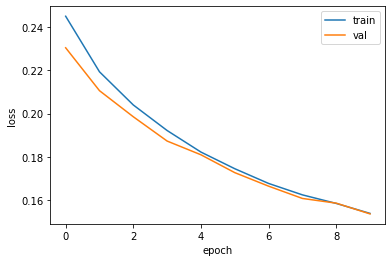

In [50]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 인코더 부분을 사용한 감성분석

In [51]:
# 인코더 모형 생성
encoder = Model(inputs=input_seq, outputs=code)

In [52]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X_vectors, labels, test_size=0.1, random_state=0)

In [53]:
# encode the train data
X_train_encode = encoder.predict(X_train)
# encode the test data
X_test_encode = encoder.predict(X_test)

In [54]:
X_train_encode.shape

(148845, 64)

In [55]:
model1 = models.Sequential()
model1.add(layers.Dense(64, activation = 'relu', input_shape=(X_train_encode.shape[1],)))
model1.add(layers.Dense(2, activation = 'softmax'))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 2)                 130       
                                                                 
Total params: 4,290
Trainable params: 4,290
Non-trainable params: 0
_________________________________________________________________


In [56]:
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [59]:
model1.compile(optimizer=optimizers.RMSprop(learning_rate=0.0001),
               loss='binary_crossentropy',
               metrics=['accuracy'])

In [65]:
history = model1.fit(X_train_encode, y_train_one_hot, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
931/931 [==============================] - 1s 2ms/step - loss: 0.3582 - accuracy: 0.8403 - val_loss: 0.3733 - val_accuracy: 0.8346
Epoch 2/10
931/931 [==============================] - 1s 1ms/step - loss: 0.3580 - accuracy: 0.8405 - val_loss: 0.3732 - val_accuracy: 0.8349
Epoch 3/10
931/931 [==============================] - 1s 2ms/step - loss: 0.3579 - accuracy: 0.8404 - val_loss: 0.3732 - val_accuracy: 0.8351
Epoch 4/10
931/931 [==============================] - 1s 1ms/step - loss: 0.3578 - accuracy: 0.8403 - val_loss: 0.3729 - val_accuracy: 0.8351
Epoch 5/10
931/931 [==============================] - 1s 2ms/step - loss: 0.3576 - accuracy: 0.8403 - val_loss: 0.3730 - val_accuracy: 0.8349
Epoch 6/10
931/931 [==============================] - 1s 1ms/step - loss: 0.3575 - accuracy: 0.8405 - val_loss: 0.3728 - val_accuracy: 0.8352
Epoch 7/10
931/931 [==============================] - 1s 1ms/step - loss: 0.3573 - accuracy: 0.8405 - val_loss: 0.3732 - val_accuracy: 0.8345
Epoch 

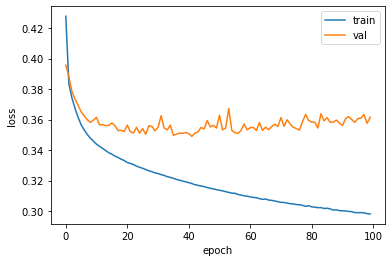

In [75]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [66]:
model1.evaluate(X_test_encode, y_test_one_hot)

517/517 [==============================] - 0s 891us/step - loss: 0.3599 - accuracy: 0.8397


[0.3599472641944885, 0.8396517038345337]